# Titanic Data Set 
This is my first kaggle submission and I'm really excited to do this.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

#Import the data
data = pd.read_csv('train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.describe()

C:\Users\Sash\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data["Age"].fillna(data['Age'].median(),inplace=True)

In [4]:
#To ensure the missing values for age are filled
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


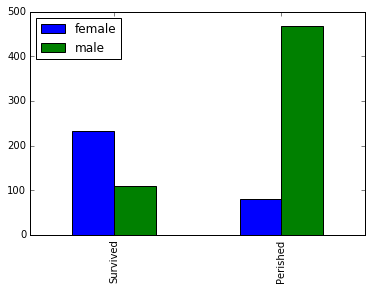

In [5]:
#Plot survived and dead passengers by gender
survived = data[data['Survived']==1]['Sex'].value_counts()
perished = data[data['Survived']==0]['Sex'].value_counts()

df = pd.DataFrame([survived,perished])
df.index = ['Survived','Perished']
df.plot(kind='bar')

Men seem to be more likely to perish than to survive. Further segregating the data by age we find that most of the people who died are middle aged

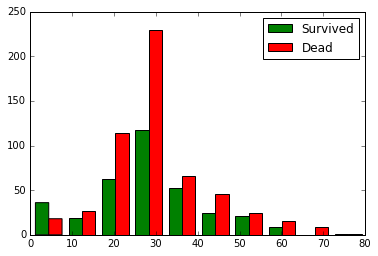

In [6]:
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']],color=['g','r'],label=['Survived','Dead'])
plt.xlabel='Age'
plt.ylabel='Number of passengers'
plt.legend()

Let us now sort the passengers by their ticket fare and see how well people from different classes performed

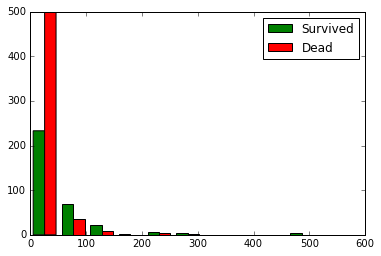

In [7]:
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],color=['g','r'],label=['Survived','Dead'])
plt.xlabel='Fare'
plt.ylabel='Number of passengers'
plt.legend()

Passengers paying lower fares seem more likely to die compared to high fare paying passengers. Finally let us categorise passengers by the class in which they travelled.

Feature Engineering:
We will now create extra features from the data provided.
Since we are creating new features that are likely to not exist on the test dataset, we will combine the train and test dataset to select our new features.



In [64]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

train_data.drop('Survived',1,inplace=True)

combined= train_data.append(test_data)
combined.reset_index(inplace=True)
combined.drop('index',inplace=True,axis=1)

combined.shape

(1309, 11)

The train and test data are now combined. The total number of rows is now 1309 which is the combined number of rows in the training and test dataset.

*1. Extract passenger titles*
Based on the salutation of the passengers, we can get additional information about the social status of the passengers.

In [65]:
combined['Title']=combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
Title_Dict = {"Capt":"Officer",
              "Col":"Officer",
              "Major":"Officer",
              "Jonkheer":"Royalty",
              "Don":"Royalty",
             "Sir":"Royalty",
              "the Countess":"Royalty",
              "Dona":"Royalty",
              "Dr":"Officer",
              "Rev":"Officer",
             "Mme":"Mrs",
              "Mlle":"Miss",
              "Ms":"Mrs",
              "Mr":"Mr",
              "Mrs":"Mrs",
              "Miss":"Miss",
              "Master":"Master",
              "Lady":"Royalty"}
combined['Title'] = combined.Title.map(Title_Dict)

combined.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


*2. Process age*
There are many NaN values in the dataset. But the accuracy of our results would be reduced if we just fill the missing values with the median. Since the median ages are likely to vary based on the sex, title and passenger class of the passengers.

In [66]:
grouped=combined.groupby(['Sex','Pclass','Title'])
grouped.median()

PassengerId   Age  SibSp  Parch      Fare
Sex    Pclass Title                                             
female 1      Miss           529.5  30.0    0.0    0.0   99.9625
              Mrs            853.5  45.0    1.0    0.0   78.1125
              Officer        797.0  49.0    0.0    0.0   25.9292
              Royalty        760.0  39.0    0.0    0.0   86.5000
       2      Miss           606.5  20.0    0.0    0.0   20.2500
              Mrs            533.0  30.0    1.0    0.0   26.0000
       3      Miss           603.5  18.0    0.0    0.0    8.0500
              Mrs            668.5  31.0    1.0    1.0   15.5000
male   1      Master         803.0   6.0    1.0    2.0  134.5000
              Mr             634.0  41.5    0.0    0.0   47.1000
              Officer        678.0  52.0    0.0    0.0   37.5500
              Royalty        600.0  40.0    0.0    0.0   27.7208
       2      Master         550.0   2.0    1.0    1.0   26.0000
              Mr             723.5  30.0    0.0    0.0   13.0000
              Officer        513.0  41.5    0.0    0.0   13.0000
       3      Master         789.0   6.0    3.0    1.0   22.3583
              Mr             640.5  26.0    0.0    0.0    7.8958

In [67]:
def clean_age(row):
    if row['Sex']=='female' and row['Pclass']==1:
        if row['Title']=='Miss':
            return 30
        elif row['Title']== 'Mrs':
            return 45
        elif row['Title'] == 'Officer':
            return 49
        elif row['Title'] == 'Royalty':
            return 39
    elif row['Sex'] == 'female' and row['Pclass'] ==2:
        if row['Title'] == 'Miss':
            return 20
        if row['Title'] == 'Mrs':
            return 30
    elif row['Sex'] == 'female' and row['Pclass'] == 3:
        if row['Title'] == 'Miss':
            return 18
        if row['Title'] == 'Mrs':
            return 31
    elif row['Sex'] == 'male' and row['Pclass'] ==1:
        if row['Title'] == 'Master':
            return 6
        elif row['Title'] == 'Mr':
            return 41.5
        elif row['Title'] == 'Officer':
            return 52
        elif row['Title'] == 'Royalty':
            return 40
    
    elif row['Sex'] == 'male' and row['Pclass'] ==2:
        if row['Title'] == 'Master':
            return 2
        if row['Title'] == 'Mr':
            return 30
        if row['Title'] == 'Officer':
            return 41.5
    elif row['Sex'] == 'male' and row['Pclass'] ==3:
        if row['Title'] == 'Master':
            return 6
        if row['Title'] == 'Mr':
            return 26
        
combined.Age = combined.apply(lambda r: clean_age(r)
                             if np.isnan(r['Age']) else r['Age'],axis=1)

combined.info()
        
        
        
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


The categorical values in the title can be converted to binary by using dummy encodings in pandas.
We will also drop the names from the dataframe since it is of no use to us anymore.

In [68]:
combined.drop('Name',axis=1,inplace=True)
combined = pd.concat([combined,pd.get_dummies(combined['Title'],prefix='Title')],axis=1)
combined.drop('Title',axis=1,inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


We can now take care of the missing fare. We will replace the fare with the median of all the fares.

In [69]:
combined.Fare.fillna(combined.Fare.mean(),inplace=True)


We will now fix the missing NaN of the embarkation location. The most common location is S. 

In [70]:
combined.Embarked.fillna('S',inplace=True)
combined = pd.concat([combined,pd.get_dummies(combined['Embarked'],prefix='Embarked')],axis=1)
combined.drop('Embarked',axis=1,inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


We will now clean the cabin names that are present. Rows without a cabin name will be marked U for unknown. Dummy encodings will be used once the cabin names are cleaned.

In [71]:
combined.Cabin.fillna('U',inplace=True)
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
combined = pd.concat([combined,pd.get_dummies(combined['Cabin'],prefix='Cabin')],axis=1)
combined.drop('Cabin',axis=1,inplace=True)
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Map the different genders 

In [72]:
combined['Sex'] = combined['Sex'].map({'male':1,'female':0})

In [73]:
combined = pd.concat([combined,pd.get_dummies(combined['Pclass'],prefix='Pclass')],axis=1)
combined.drop('Pclass',axis=1,inplace=True)
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,0,35.0,1,0,113803,53.1000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,1,35.0,0,0,373450,8.0500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Clean ticket

In [75]:
def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
        
combined['Ticket'] = combined['Ticket'].map(cleanTicket)
combined = pd.concat([combined, pd.get_dummies(combined['Ticket'],prefix='Ticket')],axis=1)
combined.drop('Ticket',inplace=True,axis=1)

Grouping families based on family size. Single passengers, small families and large families

In [76]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)

In [78]:
combined.shape

(1309, 68)

We now have all the features that we need to proceed to the next stage. We will scale the features and add it to the features list.

In [79]:
features = list(combined.columns)
features.remove('PassengerId')
combined[features] = combined[features].apply(lambda x: x/x.max(),axis=0)

*Modelling*

We will now proceed to the next phase of the analysis where we will select the best features from the features we created in the last step and feed it into our machine learning algorithm. We will use the random forest algorithm for our analysis.

In [90]:
#Import 
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

#Get back our train and test dataset
train_new = pd.read_csv('train.csv')
targets = train_new.Survived
train = combined.ix[:890]
test = combined.ix[891:]


Feature Selection:
We select the features that have the highest corelation

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=200)
clf=clf.fit(train,targets)

features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(['importance'],ascending = False)

,feature,importance
8,Title_Mr,0.138847
0,PassengerId,0.128226
2,Age,0.118309
5,Fare,0.112465
1,Sex,0.087443
26,Pclass_3,0.040678
9,Title_Mrs,0.037064
7,Title_Miss,0.034229
23,Cabin_U,0.026628
64,FamilySize,0.020469


Transform the models by selecting only the 15 best features

In [92]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

test_new = model.transform(test)
test_new.shape

(418L, 15L)

In [93]:
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

cross_validation = StratifiedKFold(targets, n_folds=5)

grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(train_new, targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.83164983165
Best parameters: {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 5}


Our model is now built. We can proceed to load the test dataset and get the predicted survival values.

In [94]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('output.csv',index=False)

In [95]:
df_output.shape

(418, 2)